In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from _collections_abc import Mapping
from scipy.spatial.distance import euclidean
import  matplotlib.pyplot as plt
import csv

Creating data on returns of stocks.

Generating distance matrix of 100x100 size, which stores Euclidean distance between all pairs of stock vectors(each of size 200,000).

In [ ]:

data = pd.read_csv('data_challenge_stock_prices.csv')
returns = 100*data.pct_change()
returns.to_csv('returns_temp.csv', index=True, header=True)



input = open('returns_temp.csv', 'r')
output = open('daily_returns.csv', 'w')
writer = csv.writer(output)
i = 0
for row in csv.reader(input):
    i+=1
    if i==1 or i==2:
        continue
    writer.writerow(row[1:])
    
input.close()
output.close()



# Clustering Algorithm for stocks
*   In the given problem, we represent each stock as a vector of size 200,000. 
*   Two stocks are compared based on Euclidean distance i.e. ```Cost(i,j)``` = Norm(```v[i]-v[j])```, where ```v[i]```, ```v[j]``` are vectors of stocks i and j.
*   If ```Cost(i,j)``` is smaller than a suitable threshold, then they have a high chance of belonging to the same sector.

***Algorithm:***


1. We define ```L``` = List of Clusters
2. Initially, ```L = [[1]]```
3. At some moment ```L = [ grp1, grp2.....grpk]``` where ```grp1``` are groups
4. We wish to add the stock ```j``` to one of the groups or determine that it forms it's own group
5. Iterate over ```i = 1, 2....k```
6. In one group, check ```cost(j,x)``` for stock ```x``` in ```grpi``` for each ```x```. If ```cost(j,x) < threshold```, we add ```j``` to this group and ```break out```
7. Else, go to next ```i```. If we don't find a ```match``` with any ```grp```, ```j``` forms a new group of it's own





In [ ]:

returns_data = np.loadtxt('daily_returns.csv', delimiter=',')
dist_matrix = np.zeros((100, 100))
for i in range(0 ,100):
    for j in range(i+1, 100):                                                    
        dist = euclidean(returns_data[:,i], returns_data[:,j])
        dist_matrix[i][j] = dist
        dist_matrix[j][i] = dist


In [ ]:
print(returns_data.shape)

(199999, 100)


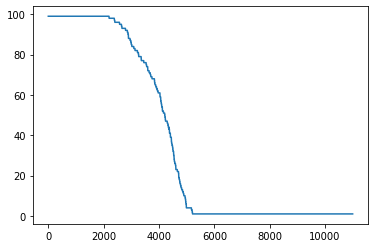

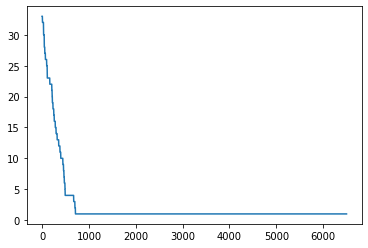

In [ ]:
def check_match(threshold,x,grp):
    for i in grp:
        if (dist_matrix[i][x] > threshold):
            return False
    return True
def cluster_(threshold, k = False):
    L = [[1]]
    for i in range (2 ,100):
        matched = False
        for grp in L:
            if (check_match(threshold,i,grp)):
                grp.append(i)
                matched =   True
                break
        if (not matched):
            L.append([i])
    if (k):
      for grps in L:
        print(grps)
   
    return len(L)


sizes = []
for i in range(1, 11000):
    sizes.append(cluster_(i/100))
plt.plot(sizes)
plt.show()

sizes=[]
for i in range(4500, 11000):
    sizes.append(cluster_(i/100))
plt.plot(sizes)
plt.show()

***In the above curve, we observe that there is a sharp fall at y = 4 sectors. So we conclude that these stocks belong to 4 sectors.***

In [ ]:
data_index = pd.read_csv('data_challenge_index_prices.csv')
returns_ind = 100*data_index.pct_change()
returns_ind.to_csv('index_temp.csv', index=True, header=True)


input = open('index_temp.csv', 'r')
output = open('daily_index_returns.csv', 'w')
writer = csv.writer(output)
i = 0
for row in csv.reader(input):
    i+=1
    if i==1 or i==2:
        continue
    writer.writerow(row[1:])
    
input.close()
output.close()


In [ ]:
index_returns_data = np.loadtxt('daily_index_returns.csv', delimiter=',')

# **Index Modeling**
For modeling the indices, we used a linear function to approximate returns. This heuristic of linearity is decided based on how real life indices work.

> Steps taken:
1. Calculated returns for stocks and indices.
2. For every index, we fitted data of all stocks using a Linear Regression Model.
3. We set a reasonable threshold on the regression coefficients to decide which stocks form part of a particular index.


In [97]:
reg = [[0 for i in range(100)] for i in range(100)]
coeffs=[]

def run_reg():
  for i in range (15):
    model = LinearRegression()
    x = returns_data
    y = index_returns_data[:,i]
    model.fit(x, y)
    for j in range(100):
      reg[i][j] = (model.coef_[j],j)
    coeffs.append(model.coef_)
    reg[i].sort(reverse = True)


run_reg()

print(reg)

[[(0.01804967793331673, 39), (0.016981745652540348, 78), (0.01695640733449505, 90), (0.016790537856400983, 54), (0.01667639997346382, 0), (0.016637083070788334, 20), (0.016504752989493873, 75), (0.016476937038229552, 38), (0.01642040079626924, 4), (0.016121100708863818, 88), (0.01606823857608713, 82), (0.01590607070846261, 26), (0.015666873643537277, 25), (0.015634517095564748, 43), (0.015624938078190155, 14), (0.015474709881036247, 1), (0.015438523600859446, 18), (0.015328713070853088, 79), (0.015321150875181232, 10), (0.015302821009517239, 11), (0.015286182383993254, 22), (0.015162476768478214, 21), (0.015098239209329649, 67), (0.015059770353608148, 45), (0.014635159330867075, 49), (0.0022695240633454736, 28), (0.0017647502245145322, 85), (0.0015863913879249026, 48), (0.0015063142511931738, 62), (0.001270332137613025, 73), (0.0011949453271183842, 81), (0.0011721423489408473, 5), (0.0011537534837158597, 69), (0.0010919353491318032, 36), (0.0010846352027576991, 15), (0.0010808653502074

In [96]:
thresh = 10
for k in range (15):
  break_pt = 0
  for i in range (2,100):
    if (reg[k][i][0]/reg[k][i-1][0] > 10):
      break_pt = i
      break
  print("For ",k,"th index, stocks are: ", reg[k][0:i])
    

print("Chosen clustering threshold is", 49.9, "which corresponds to 4 sectors, as spotted in graph.")
cluster_(49.9,True)

For  0 th index, stocks are:  [(0.01804967793331673, 39), (0.016981745652540348, 78), (0.01695640733449505, 90), (0.016790537856400983, 54), (0.01667639997346382, 0), (0.016637083070788334, 20), (0.016504752989493873, 75), (0.016476937038229552, 38), (0.01642040079626924, 4), (0.016121100708863818, 88), (0.01606823857608713, 82), (0.01590607070846261, 26), (0.015666873643537277, 25), (0.015634517095564748, 43), (0.015624938078190155, 14), (0.015474709881036247, 1), (0.015438523600859446, 18), (0.015328713070853088, 79), (0.015321150875181232, 10), (0.015302821009517239, 11), (0.015286182383993254, 22), (0.015162476768478214, 21), (0.015098239209329649, 67), (0.015059770353608148, 45), (0.014635159330867075, 49), (0.0022695240633454736, 28), (0.0017647502245145322, 85), (0.0015863913879249026, 48), (0.0015063142511931738, 62), (0.001270332137613025, 73), (0.0011949453271183842, 81), (0.0011721423489408473, 5), (0.0011537534837158597, 69), (0.0010919353491318032, 36), (0.0010846352027576

4

# Method to find covariance of predicted data

1.   We define X as a vector of size 200,000 which stores the absolute difference between our predicted value of an index and the given value, over all timestamps
2.   To calculate covariance between two indices X and Y, we calculate respective difference arrays X and Y, and apply the formula:

```Cov(X,Y) =E(XY) - E(X).E(Y)```

